# Comparion between Benin, Sierraleone and Togo Analysis Notebook

## Import the dependecies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

## Import custom modules

In [2]:
# Add this at the top of your notebook to modify the Python path
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.analyzer import SolarAnalyzer
from src.data_loader import DataLoader	
from src.data_visualizer import DataVisualizer


In [3]:
# Load the dataset
print("Loading dataset...")
benin = DataLoader.load_csv('../data/cleaned/benin_clean.csv')
sierra_leone = DataLoader.load_csv('../data/cleaned/sierraleone_clean.csv')
togo = DataLoader.load_csv('../data/cleaned/togo_clean.csv')

# Add country identifiers
benin['Country'] = 'Benin'
sierra_leone['Country'] = 'Sierra Leone'
togo['Country'] = 'Togo'

# Combine datasets
df = pd.concat([benin, sierra_leone, togo])


Loading dataset...


## Metric Comparison

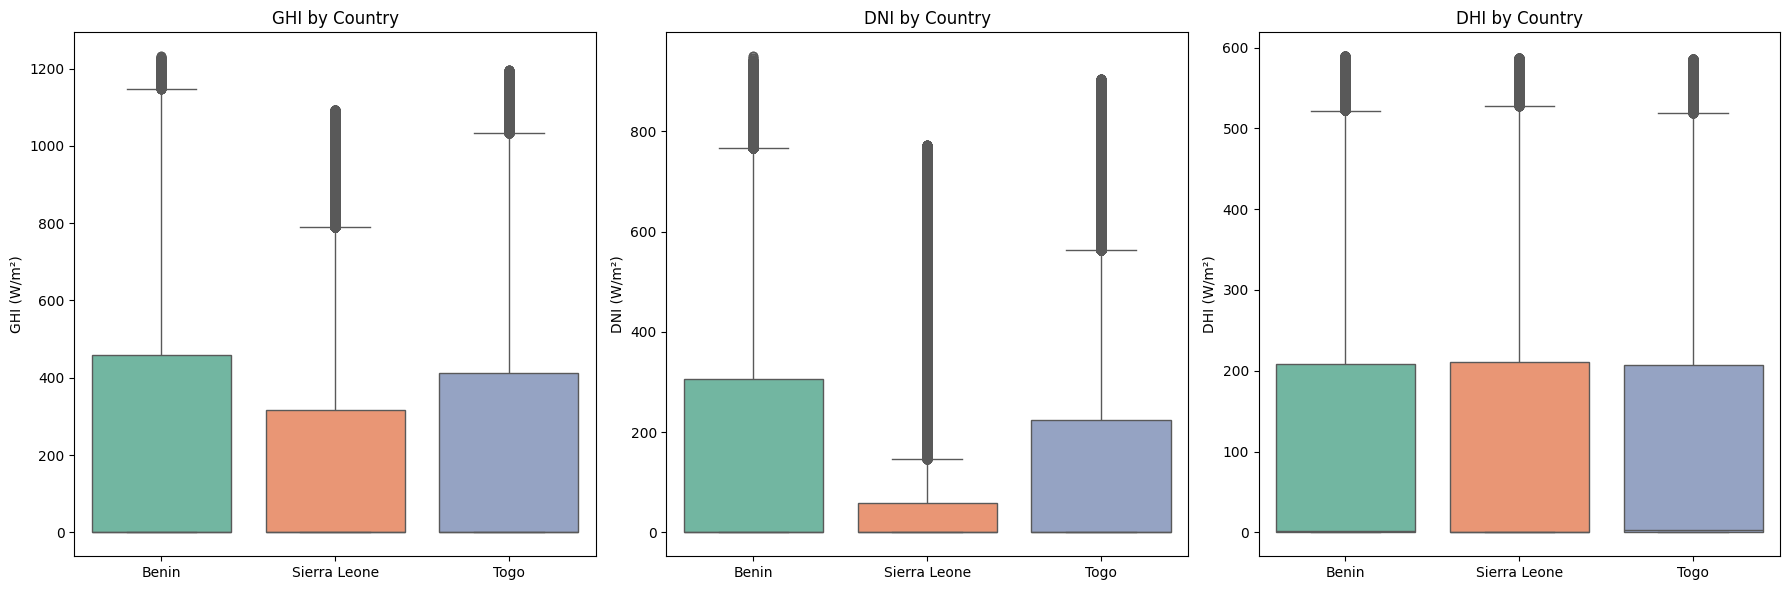

In [4]:
metrics_comparison = DataVisualizer.boxplots_by_country(df)
plt.show()

In [5]:
# Summary Table
summary_table = SolarAnalyzer.calculate_summary_stats(df)
print("Summary Statistics:")
print(summary_table)

Summary Statistics:
                     GHI                            DNI                     \
                    mean median         std        mean median         std   
Country                                                                      
Benin         233.945267    1.8  325.965008  164.634068    0.0  260.759699   
Sierra Leone  181.330280    0.3  274.567808  100.929474    0.0  198.474258   
Togo          221.102454    2.1  315.017895  145.362870    0.0  246.256147   

                     DHI                     
                    mean median         std  
Country                                      
Benin         111.491348    1.6  151.127545  
Sierra Leone  107.024714    0.0  150.285501  
Togo          110.834989    2.5  150.925949  


## Statistical Testing

In [6]:
# Statistical Testing - ANOVA for GHI
benin_ghi = benin['GHI'].dropna()
sierra_ghi = sierra_leone['GHI'].dropna()
togo_ghi = togo['GHI'].dropna()

f_stat, p_value = stats.f_oneway(benin_ghi, sierra_ghi, togo_ghi)
print(f"\nANOVA Results for GHI:")
print(f"F-statistic: {f_stat:.2f}, p-value: {p_value:.4f}")



ANOVA Results for GHI:
F-statistic: 4224.51, p-value: 0.0000


In [7]:
# Kruskal-Wallis test (non-parametric alternative)
h_stat, p_value_kw = stats.kruskal(benin_ghi, sierra_ghi, togo_ghi)
print(f"\nKruskal-Wallis Results for GHI:")
print(f"H-statistic: {h_stat:.2f}, p-value: {p_value_kw:.4f}")



Kruskal-Wallis Results for GHI:
H-statistic: 2664.08, p-value: 0.0000


### Key Observations

- **Benin** shows the **highest median and mean GHI**, but also the **greatest variability**.
- **Sierra Leone** has the **lowest median GHI and DNI**, with median values close to zero.
- Despite similar average DHI values across countries, **Togo** stands out with the **highest median DHI**.


## Visual Summary

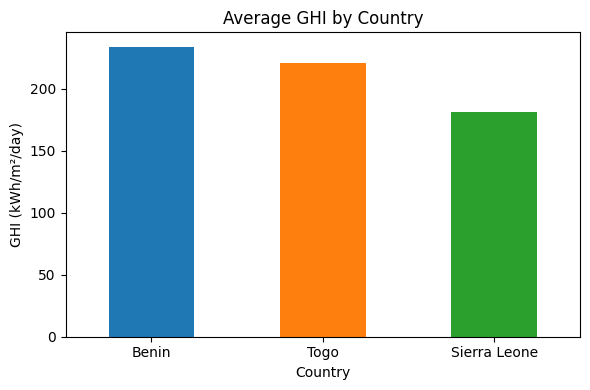

In [8]:
# Visual Summary - Average GHI ranking
ghi_ranking = DataVisualizer.plot_ghi_ranking(df)
plt.show()